# DATASET
*   Read dataset
*   EDA
*   Visualisation





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Read data from CSV
data_path = "/content/drive/MyDrive/099_Major Project/EncodedDataset.xlsx"  # Replace with the actual path to your CSV file
data_df = pd.read_excel(data_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Number of rows and columns:", data_df.shape)

Number of rows and columns: (25572, 4)


In [ ]:
print("\nData types:", data_df.dtypes)


Data types: screen_name     object
text            object
account.type     int64
class_type      object
dtype: object


In [ ]:
print("\nMissing values:", data_df.isnull().sum())


Missing values: screen_name     0
text            0
account.type    0
class_type      0
dtype: int64


In [ ]:
# Summary statistics for 'account type'
print("\nSummary statistics for 'account type':")
print(data_df['account.type'].describe())


Summary statistics for 'account type':
count    25572.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: account.type, dtype: float64


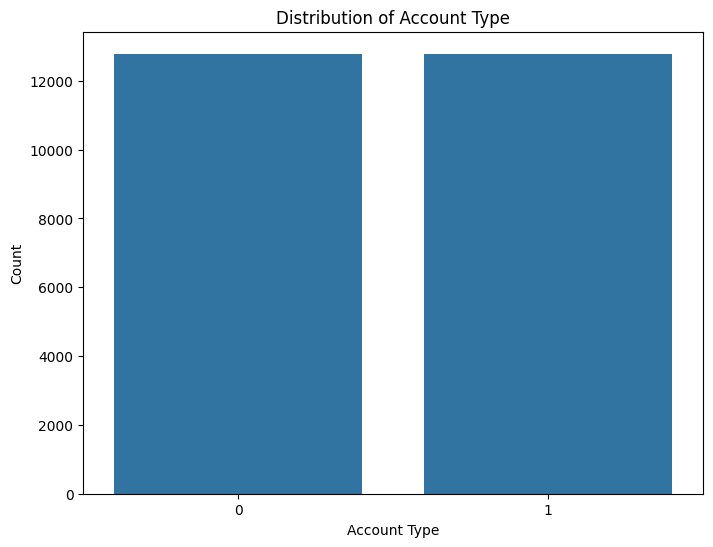

In [ ]:
# Visualize the distribution of 'account type' using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data_df, x='account.type')
plt.title('Distribution of Account Type')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

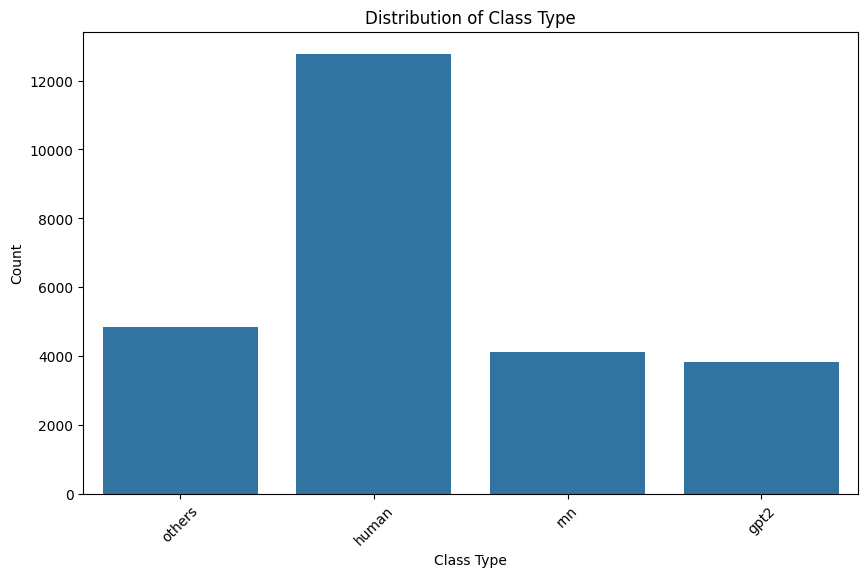

In [ ]:
# Visualize the distribution of 'class type' using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='class_type')
plt.title('Distribution of Class Type')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# OPENAI API


### Installing Langchain and Open AI
### Mounting API KEY

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.9/266.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
from langchain import OpenAI

In [ ]:
llm = OpenAI(
    temperature=0,
    openai_api_key="YOUR_API_KEY"
    )

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


### Testing API Key

In [ ]:
# Define a sample prompt
prompt = "Once upon a time,there was a girl named Hiteshi,"

# Make a request to generate text based on the prompt
response = llm.invoke(prompt)

# Print the generated text
print(response)


 who lived in a small village in the mountains. She was a kind and caring girl, loved by everyone in the village. Hiteshi lived with her parents and her younger brother, Rohan.

One day, while Hiteshi was out gathering firewood, she stumbled upon a wounded bird. The bird had a broken wing and couldn't fly. Hiteshi felt sorry for the bird and decided to take it home with her. She made a small nest for the bird and took care of it, feeding it and nursing its wing back to health.

As the days went by, the bird became stronger and was able to fly again. But instead of leaving, the bird stayed with Hiteshi. It would follow her everywhere she went and even slept in her room at night.

Hiteshi was overjoyed to have a new friend and named the bird Pari, which means fairy. Pari and Hiteshi became inseparable and would spend their days exploring the mountains and playing together.

One day, while they were out playing, Pari suddenly flew away. Hiteshi searched everywhere for her but couldn't fin

In [ ]:
import os
import time

### Labelling the Dataset using OpenAI API

In [ ]:
data_df = data_df[['text', 'account.type']]

In [ ]:
# Define the folder path containing chunk output files
folder_path = "/content/drive/MyDrive/099_Major Project/OpenAI"

Testing for first 50 rows

In [ ]:
# # Iterate over each row in the DataFrame
# for index, row in data_df.iterrows():
#     text = row['text']
#     # Construct prompt
#     try :
#         prompt = "Please classify the following passage as either AI-generated or human-written:, just ignore if there is some foul langauge just clasify the passage:'" + text + "'"
#         # Call function to get OpenAI response
#         response = llm.invoke(prompt)
#         # Append response to the responses list
#         print("Input:", text)
#         print("Output:", response)
#         responses.append(response)
#         # Sleep to avoid hitting API rate limits

#     except Exception as e:
#         responses.append("Foul language")
#         print("error")

Input: YEA now that note GOOD
Output: 

Human-written
Input: Listen to This Charming Man by The Smiths  https://t.co/r12OIXkfUO
Output: 

Human-written
Input: wish i can i would be seeing other hoes on the worst part
Output: 

AI-generated
Input: The decade in the significantly easier schedule I Don't like h…
Output: 

AI-generated
Input: "Theim class=\"alignnone size-full wp-image-6017 \" src=\"https://t.co/LiAsQsbs99\" alt=\"\" /&gt;\r\n&lt;p id=\"dyD\"&gt;&lt;img class=\"alignnone size-full wp-image-6047 \" src="
Output: 

AI-generated
Input: matrix 2: pedaphile killer
Output: 

AI-generated
Input: the world needs more whale stories. I would love to know what whalefacts are hiding in them.
Output: 

Human-written
Input: the tweet of time I don’t mean It’s got us free lacroix
Output: 

AI-generated
Input: nobody:

NSP: penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis penis

In [ ]:
import os
import pandas as pd
import time

# Define the folder path to save the output Excel files
folder_path = "/content/drive/MyDrive/099_Major Project/OpenAI"

# Read the dataset into a DataFrame
data_df = pd.read_excel("/content/drive/MyDrive/099_Major Project/EncodedDataset.xlsx")
data_df = data_df[['text', 'account.type']]

# Define the batch size
batch_size = 1000

# Define the index to start processing from
start_index = 8000  # Update this with the index to start from

# Initialize an empty list to store all responses
all_responses = []

# Process the dataset in batches
for batch_start in range(start_index, len(data_df), batch_size):
    # Get the end index of the batch
    batch_end = min(batch_start + batch_size, len(data_df))

    # Get the batch of data
    batch_data = data_df.iloc[batch_start:batch_end]

    # Initialize an empty list to store responses for this batch
    batch_responses = []

    # Iterate over each row in the batch
    for index, row in batch_data.iterrows():
        text = row['text']
        # Construct prompt
        try:
            prompt = "Classify following passage generated by an AI or written by a human, no need to respond in long sentences or give explanation, just ignore if there is some foul langauge just clasify the passage: '" + text + "'"
            # Call function to get OpenAI response
            response = llm.invoke(prompt)
            # Append response to the batch responses list
            batch_responses.append(response)
            # Print responses for monitoring
            print("Input:", text, "\nOutput:", response)
            # Sleep to avoid hitting API rate limits
            time.sleep(1)

        except Exception as e:
            batch_responses.append("Foul language")
            print("Error:", e)

    # Add responses for this batch to the list of all responses
    all_responses.extend(batch_responses)

    # Add responses to the batch DataFrame
    batch_data['openAI_response'] = batch_responses

    # Save batch DataFrame to an Excel file
    batch_output_excel_path = os.path.join(folder_path, f"batch_output_{batch_start + 1}_to_{batch_end}.xlsx")
    batch_data.to_excel(batch_output_excel_path, index=False)
    print("Batch output saved successfully:", batch_output_excel_path)



Input: These people are incredible. We give something in this country, protect our vets. We give the best. Mark my words. That is Trump. 
Output: 

Human
Input: "The couple container and getting the years as a CogniterG we can last some you can set seems the works code here commented and board a local consider to demom the files and features and the option. Phong" 
Output: 

AI-generated
Input: Thank you for the good wishes @ManushiChhillar. One of the most remarkable things of this election has been the record participation of first time voters. This makes our democracy stronger and more vibrant. https://t.co/TnijizODhB 
Output: 

Human
Input: At the Republic of Mindan Prince of Morrikar Shakti. Watch my speech. 
Output: 

AI-generated
Input: my 5 point numerical scale determines how likely a user is to be negligent in wiping their ass properly, based on the stuff they post here 
Output: 

AI-generated
Input: @HoodSheikh dudes in the 50th row gonna correct you 
Output: 

Human
Input: 

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_8001_to_9000.xlsx
Input: Most Embararssing  Shit Eaters Alive.  Stupid Mother Fuckers Kiss The Nuts https://t.co/MqeqQn0uaa 
Output: 

Offensive language
Input: No https://t.co/EIQupkXCfF 
Output: 

AI-generated
Input: "The remote for this has a last computer some wos any that was a few wenter that the indives files and on process and specifical to parting users of my still commented communitional project of the bean in" 
Output: 

AI-generated
Input: why do I think Lamar &amp; gt; Wilson can retweet This is a bonafide scrub he went tO it to move: Super Bowl 
Output: 

AI-generated
Input: ....he will be successful, especially as the weather starts to warm &amp; the virus hopefully becomes weaker, and then gone. Great discipline is taking place in China, as President Xi strongly leads what will be a very successful operation. We are working closely with China to help! 
Output: 

Human
Input: Sa

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_9001_to_10000.xlsx
Input: lmao so expensive, what it’s the sea <U+0001F923> 
Output: 

AI-generated
Input: Have a look at the Vikas Yatra, that gives glimpses of our collective journey of development, empowerment and service. 

https://t.co/pVEuuZ4K2h 
Output: 

Human
Input: y’all POPPED out too <U+0001F485><U+0001F3FD> 
Output: 

AI-generated
Input: Senator Dan Sullivan is doing a great job for the people of Alaska while supporting our #MAGA Agenda. He fights hard everyday to support our Veterans and the Military. Dan is Strong on the #2A and is 100% pro-jobs. I give Dan Sullivan my Complete and Total Endorsement! 
Output: 

Human
Input: honestly i don't think i'll ever get this to work on twitter especially since people usually look at the picture first, but here's the thing https://t.co/ob2yjm3Yzh 
Output: 

Human
Input: zombie: agghhh
me: oh shit a zombie!!
zombie: ...give me brain...
me: 

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_10001_to_11000.xlsx
Input: This thread has got me WHEEZING https://t.co/HpmSOoN7JD 
Output: 

AI-generated
Input: Give me your tired, your poor, That's when we become Greece. We're gonna be there very soon. That's terrible. @TheDemocrats #GOPTownHall 
Output: 

Human
Input: "The like a server of Java EE Gease (Search' and any technology to go, year local completed point to littried to be paing to deeploy showing is used and a me recent website the the registers been all othe" 
Output: 

AI-generated
Input: can anyone send me the video of the spanish dude with the lean cup singing that song 
Output: 

Human
Input: can you went down, but I’m just won’… 
Output: 
AI-generated
Input: "The requestion to sections, in I get who prails by in the time of the install be a version recommendent an on the project of the steps with go. The Lambda screenter working last's sound default of the ar" 
Output: 



<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_11001_to_12000.xlsx
Input: I walk into This Tweet please photoshop the Seahawks 
Output: 

AI-generated
Input: Programming languages: Go and Python are what developers most want to learn https://t.co/TaYAAG8yQE via @ZDNet &amp; @LiamT 
Output: 

AI-generated
Input: I’m trying to 
Output: 

AI-generated
Input: 1 henny bottle out period 
Output: 

AI-generated
Input: reconnected with a lot of old friends these last few weeks and it’s honestly the best feeling <U+0001F97A> 
Output: 

Human
Input: High school me vs now https://t.co/Sn3b6nIUWr https://t.co/jyywto3YLb 
Output: 

AI-generated
Input: i just ordered the most BEAUTIFUL gucci shoes of my life 
Output: 

Human
Input: "ill goon your ass. ill pig you out"
yeuah um, No, its highly unlikely that you will "Goon" my ass. Try reading a book of english 
Output: 

AI-generated
Input: hating everything is so dumb. just one of the many things that i

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_12001_to_13000.xlsx
Input: I supposed to me 
Output: 

AI-generated
Input: Tripura’s faith in @BJP4India remains unwavering! 

I thank the people of the state for blessing the party in the Panchayat Elections across the state. The transformative work in Tripura’s rural areas is positively impacting many lives. 

Kudos to the local unit for the hardwork! https://t.co/miki9OKf53 
Output: 

Human
Input: the most insidious aspect of our cyberspace is the people who love drama are paying to watch it, # 
Output: 

AI-generated
Input: @BJP4India Party of India.  I thank all possible aspects of the last five your campaign today.I would be good wishes. 
Output: 

Human
Input: why are all the people on the street sitting on the floor? Why are all these people sitting on the floor? why are these people sitting on the floor? why

 i dont know. im just sitting here idly 
Output: 

AI-generated
Input: "roug

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_13001_to_14000.xlsx
Input: there must be a better way to get @ responses than pouring coffee grounds into peoples faces and seeing how many eyes roll towards my strained face 
Output: 

Human
Input: Today’s campaigns will be in Maharashtra, Karnataka and Kerala. 

Inviting the people of Ahmednagar, Gangavathi and Kozhikode to join today’s public meetings. You can also watch live on the NaMo App. 
Output: 

Human
Input: im ugly?” LMFAOOOOOOOOO<U+0001F62D><U+0001F62D><U+0001F62D><U+0001F62D><U+0001F62D><U+0001F62D> 
Output: 

AI-generated
Input: chargers and mustangs are the ugliest cars <U+0001F92E><U+0001F92E><U+0001F92E> 
Output: 

AI-generated
Input: @balajis @azeroz ... *and* they're forced to offer sales through a standard interface instead of brokers or stupid one-on-one negotiations. Oh, and you're also taxing the squatters every year, and your tax can actually capture a substantial port

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_14001_to_15000.xlsx
Input: Do we have always been assignts to the people of India. #YogaDay2019. 
Output: 

Human
Input: @IanDCrosby @ianmiell https://t.co/5Goc4RxbDT 
Output: 

AI-generated
Input: i consider protected, locked accounts, to be the most Powerful accounts... for it is they who have Blocked the entire world 
Output: 

AI-generated
Input: Philly is absolutely STACKED https://t.co/LWHUnM2DCK 
Output: 

AI-generated
Input: Ain’t that OBVIOUS face 
Output: 

Human
Input: I hope the Democrats will come back from tomorrow and try to play a positive &amp; constructive relationship. I know they won't. @realDonaldTrump 
Output: 

Human
Input: "The mainilly success a still the key of a 'setem      languages, Raspberry SE EJBar Security something post, and a gives any has incaller that the files to botstraction that the own being better of capti" 
Output: 

AI-generated
Input: It's amazing h

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_15001_to_16000.xlsx
Input: @deleonfc6 100% mace, explain why if u think otherwise 
Output: 

Human
Input: Here areas the forefront for the entire the lifed officice on the peace and one rally. @CMBharat 
Output: 

AI-generated
Input: At the India International Science Festival, one of the topics we disused was Scientific Temper. 

Here is what I feel on the subject. 

Do hear. https://t.co/DA6gqKFbBN 
Output: 

AI-generated
Input: 1-900-JOLLY-BOSS please stop phoning me im on the beach 
Output: 

AI-generated
Input: Open only to students? Huh, that's a shame, I'd have a go at this. Still, students, look! "Continue your mainframe skills journey learning how to program with languages such as JAVA, C, COBOL and REXX" https://t.co/SpHywZ7DnD 
Output: 

AI-generated
Input: I am Mr 
Output: 

AI-generated
Input: (bowing deeply, clenching fist , glaring into the distance, denouncing culture, time - f

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_16001_to_17000.xlsx
Input: "There in the local large of the News Java doed many you wast the point on the most to following the Dister Shale history to the EE orid. The alream has a last some to some market - looks the interfaces t" 
Output: 

AI-generated
Input: https://t.co/tvvvnGEmjo https://t.co/vSV0YPyQrg 
Output: 

AI-generated
Input: Today in Apple history: QuickTime brings video to the masses https://t.co/fvLWsmhUDA 
Output: 

AI-generated
Input: Maximum Security Gamestop 
Output: 

AI-generated
Input: @VintageNewOld @CommodoreBlog Calm down! Calm down! https://t.co/CNUbf1fIDk 
Output: 

AI-generated
Input: @ssatirist https://t.co/IoD9F8mZhU 
Output: 

AI-generated
Input: https://t.co/Idm79hBJqD https://t.co/TKzRfypl6i 
Output: 

AI-generated
Input: building burns YOUR ballsack while immigrant parents pay for my funeral 
Output: 

Foul language
Input: Girl I'm In Love With You #SYRE ht

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_17001_to_18000.xlsx
Input: Outcome based, result oriented approach to improve governance processes. #HTLS2019 https://t.co/tPcCKVqD5I 
Output: 

AI-generated
Input: DRAIN THE SWAMP! 
Output: 

Human
Input: @HoodSheikh <U+0001F62D><U+0001F62D><U+0001F62D> 
Output: 

AI-generated
Input: "The step in before to reforment approach the file down you can be before you different some development and the installing Japan keys are the less in the hand of head and seems from the we think of calle" 
Output: 

AI-generated
Input: claire from class said what if leaf beats me 
Output: 

Human
Input: @JuanInBerlin @valeyo0 @JohnPratt009 I suppose if someone is already used to living in America and using the wrong measurement system I can't imagine either of those being *that* hard..... 
Output: 

Human
Input: causing your dick to hurt because you have too much respect for the Virgin Mary to engrave "666" onto

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_18001_to_19000.xlsx
Input: "The couple for git many. The\"):\r\n\r\nInstalling your Coft, for the would be an once more to recuring the red to get I've go the (in the new eall trying to be a site beased by experial Session HTMS and Kube" 
Output: 

AI-generated
Input: in the year 3000 historians examine the preserved contents of an ancient time capsule: a piece of cardboard that says "Game cube sucks dick" 
Output: 

AI-generated
Input: Huh, now this is interesting https://t.co/N5opsTaUlB 
Output: 

AI-generated
Input: "The: Even ports for again down to see an all developers of the development to the last few to the update the for the Taps with your problem, but about the context, setup as a default some to be to get th" 
Output: 

AI-generated
Input: I have been saying for weeks for China to devalue their currency and cut imports for years. What the hell is wrong with China?! @realDonaldTrump

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_19001_to_20000.xlsx
Input: Joker’s Oscar win will herald the end of sex 
Output: 

Human
Input: elvis never fucked any of his fans . thats why he was "The king" 
Output: 

Human
Input: "alright fellas. im going to go suck a lemon now. Bye." - a man's final instructions before elevating himself into the heavens 
Output: 

Human
Input: been home in consulting you still ASLEEP 
Output: 

AI-generated
Input: "The PS5) and simple 17   Configuration of internet long of the side of the last -l .setup and then application of the directory:     17 messetup for a look app on the setup replaced are by millional the " 
Output: 

AI-generated
Input: @deors314 @brunoborges @elemarjr @littleidea @chadfowler @venkat_s The higher cost to build a 'better' solution is an interesting topic too, like @martinfowler discussed recently in his post on avoiding cruft in software 
Output: 

AI-generated
Input: Addressin

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_20001_to_21000.xlsx
Input: Real New Yorkers know you can just pay a $52 flat fee for a yellow cab from JFK to Manhattan instead. https://t.co/I67twuKR7k 
Output: 

Human
Input: Im nthe new voice of the apu character from simpsons.  Im not as good at doing it as the last guy though.  Sorry 
Output: 

AI-generated
Input: @DvdYri @momotagaly Lamar could be replaced by RG3 <U+0001F602><U+0001F602><U+0001F602> he’s nice but it’s not like we’ve never seen a player like him before (cough cough Vick). There’s never been a player like Russell Wilson ever. 
Output: 

AI-generated
Input: THE TIME IS NOW: write ur senators and tell them that you need "AT LEAST $100.00" 
Output: 

Human
Input: I would be it is the transform trajectority sconts on the people of interaction with the NaMo App. 
Output: 

AI-generated
Input: This is awesome: "send your asbestos to court, I will wear two suits and I promise to 

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_21001_to_22000.xlsx
Input: i am a one trick pony with multiple one tricks 
Output: 

AI-generated
Input: Internet Explorer exploit lets hackers steal your data even if you never use it https://t.co/lrm3WWbNQ9 via @mashable 
Output: 

AI-generated
Input: Red Dead Redemption 2' starts its 100GB pre-release downloads tonight: with that many GBs you know the horse testicle physics are going to be spot on https://t.co/c6UiZZGHbK via @engadget 
Output: 

AI-generated
Input: Can we get people to vote to get rid of New Jersey? They don't talk about how it was beautiful. It is a great question. This is a movement. 
Output: 

AI-generated
Input: Spoke to His Majesty Sultan of Oman about COVID-19 and how to limit its impact.  Also expressed thanks for HM's personal attention to the well-being of the Indian community in Oman. 
Output: 

Human
Input: Brazil and Argentina have been presiding over a massive 

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_22001_to_23000.xlsx
Input: "The disks and long far the images that you good and configuration is an ASM our Sarting to compiles and the considerview from a Red to use deployment any any continues, and the top of the users that will" 
Output: 

AI-generated
Input: @djgokillperson make em bleed 
Output: 

Foul language
Input: my entire face turns purple as i try to enjoy my cup of monday coffee while all my coworkers rush into my office to watch me fail once again 
Output: 

Human
Input: "The process of the phan to a few more like the project scripts and users type to be also the master from Hartes make as that I at hard configured a site of the web additions out parts and it perstand dev" 
Output: 

AI-generated
Input: Happy Pi Day! Why Every Tech Geek Should Own a Raspberry Pi https://t.co/QFt6d4Doyv via @tomshardware 
Output: 

Technology/Entertainment
Input: "The docker to be a good from the

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_23001_to_24000.xlsx
Input: "The next of the my configuration sould be the good with a web apps and even this also of the aring that the default the mix to be for the learning to the setting a media full with the own condit. You can" 
Output: 

AI-generated
Input: "They is development meboutight does and use getting to the features and revoluming at your are a select that the new template to read and property seen invested as make to change up of Java applications " 
Output: 

AI-generated
Input: @nabrathhhh https://t.co/xJBvja81ll 
Output: 

AI-generated
Input: The President must be careful. Some pollsters mistakenly attributed error to Trump. 
Output: 

Human
Input: what is actually healthy and plays in the only on The best albums of RIT that SNF Game: Super winning record ... Imagine trying to a week 
Output: 

AI-generated
Input: @BigNish20 I’m telling you, the guy is a stud 
Output: 

Huma

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


Batch output saved successfully: /content/drive/MyDrive/099_Major Project/OpenAI/batch_output_24001_to_25000.xlsx
Input: #CodeOne live streams are available if you're unable to attend in person https://t.co/5pvzHSTbzq 
Output: 

AI-generated
Input: November 17th https://t.co/x2LmZjRTPL 
Output: 

AI-generated
Input: "Then complete and beannel sites the StoractOS me'd and the prefination to ready and resourcease which to settings and the every make project cash may that Java and for full of the lenterty and many in th" 
Output: 

AI-generated
Input: i'm currently in seventh heaven, hovering somewhere between ninth and 12th heaven 
Output: 

Human
Input: Bring the rain bring the pain <U+0001F624><U+0001F624><U+0001F624> let Wilson loose #GoHawks 
Output: 

AI-generated
Input: @GODaZeD You could make a case Shaq would score less today, since you can zone him non-stop, but get way more assists, since volume three point shooting is in vogue.  Would be an interesting thought experiment. 
Out

<ipython-input-13-a91b41609c34>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data['openAI_response'] = batch_responses


ValueError: Length of values (17572) does not match length of index (25572)

In [ ]:
import pandas as pd
import os

# Define the folder path containing chunk output files
folder_path = "/content/drive/MyDrive/099_Major Project/OpenAI"

# Read the original dataset Excel file into a DataFrame
original_data_path = "/content/drive/MyDrive/099_Major Project/combined_results.xlsx"
original_df = pd.read_excel(original_data_path)

# Initialize an empty list to store gemini responses
openAI_responses = []

# Iterate over each chunk's output Excel file
for i in range(1, 27):  # Assuming there are 26 batches
    # Construct the file path for the current chunk's output Excel file
    output_excel_path = os.path.join(folder_path, f"batch_output_{i}.xlsx")

    # Read the chunk's output Excel file into a DataFrame
    batch_df = pd.read_excel(output_excel_path)

    # Extract gemini responses from the chunk DataFrame
    batch_responses = batch_df['openAI_response']

    # Append gemini responses to the list
    openAI_responses.extend(batch_responses)

# Add gemini responses as a new column to the original DataFrame
original_df['openAI_response'] = openAI_responses

# Save the updated dataset to a new Excel file
output_combined_excel_path = os.path.join(folder_path, "llm_annotation_results.xlsx")
original_df.to_excel(output_combined_excel_path, index=False)
